In [2]:
import cv2
import numpy as np
from utils import show_images

src = cv2.imread('./image/thulogo.png')

()


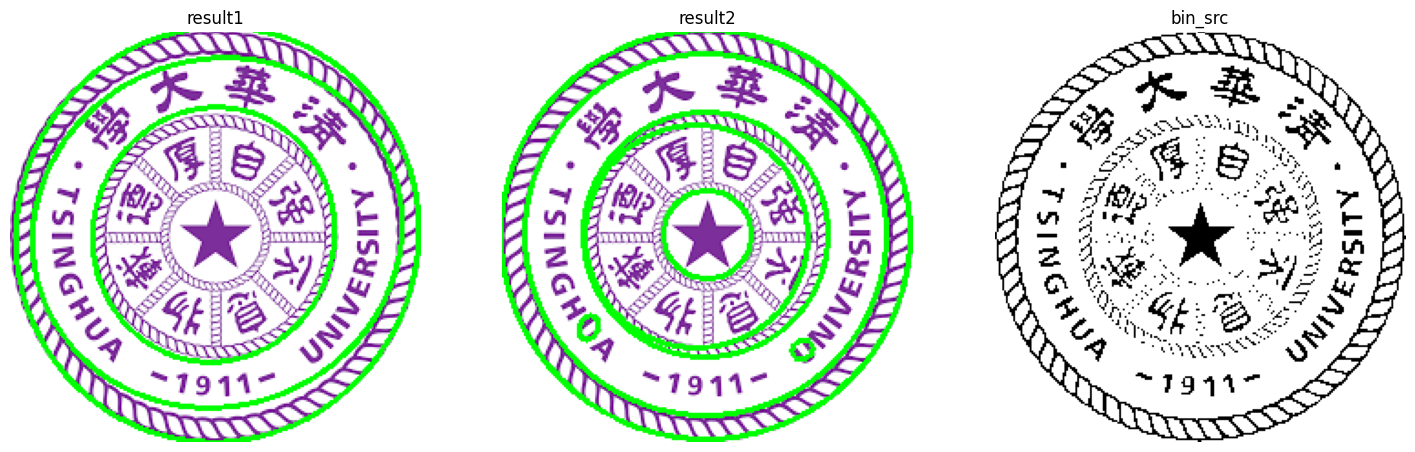

In [8]:
import math

def draw_ellipses(src, ells, ells_type):
    result = np.copy(src)
    if ells is not None:
        for one_ell in ells:
            now_ell = one_ell[0] 
            center = now_ell[0:2].astype(int)
            angle = now_ell[5] * 180 / math.pi

            # 注意这里，每个方法返回值其实不太一样
            if ells_type == 0:
                # 这个是 findEllipses 返回值，(x,y,a,b,raidus,score)
                axes = now_ell[2:4].astype(int)
            elif ells_type == 1:
                # 这个 EdgeDrawing 的返回值
                axes = now_ell[3:5].astype(int) + int(now_ell[2])

            cv2.ellipse(result, center, axes, angle, 0, 360, (0, 255, 0), 2)
    return result

# ----------------------- findEllipses -------------------------------------
ells = cv2.ximgproc.findEllipses(
    src, 
    scoreThreshold=0.7, 
    reliabilityThreshold=0.7, 
    centerDistanceThreshold=0.02
)
result1 = draw_ellipses(src, ells, ells_type=0)

# ----------------------- EdgeDrawing -------------------------------------
gray_src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ed = cv2.ximgproc.createEdgeDrawing()
edParms = ed.Params()
edParms.GradientThresholdValue = 38
edParms.EdgeDetectionOperator = cv2.ximgproc.EdgeDrawing_SOBEL
edParms.AnchorThresholdValue = 8
ed.setParams(edParms)
# 最开始要执行这个函数，相当于和原图绑定一下
ed.detectEdges(gray_src)

# EdgeDrawing 可以检测边缘、直线、椭圆
ells = ed.detectEllipses()
result2 = draw_ellipses(src, ells, ells_type=1)

show_images([
    ('result1', result1),
    ('result2', result2)
])
